### Section 0: Import

In [1]:
from IPython import get_ipython
ipython = get_ipython()

from pysb import *
from pysb.export import export
from pysb.simulator import BngSimulator, KappaSimulator

import matplotlib.pyplot as plt
from pylab import linspace

import seaborn
palette = seaborn.color_palette('colorblind')

from pysb.pathfinder import set_path
set_path('bng', '/opt/bionetgen.RuleWorld/bng2/') # path to bng2 folder (BNG2.pl executable)
set_path('kasim', '/opt/KaSim4.Kappa-Dev/') # path to KaSim executable (v4 or newer)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 95% !important; }</style>"))

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


ValueError: Unable to access path /opt/bionetgen.RuleWorld/bng2/. Check the file exists and the current user has permission to access it.

### Section 1: Define Model

In [2]:
Model()

<Model '_interactive_' (monomers: 0, rules: 0, parameters: 0, expressions: 0, compartments: 0) at 0x7f60a9190b00>

In [3]:
# Define model components

# paste inside brackets the common names for metabolites
metabolites = []

# paste inside brackets the common names for genes
genes = []

# paste inside brackets the DNA binding sites: BS- followed by genomic coordinates
binding_sites = []

Monomer('met', ['name', 'loc', 'prot'], 
    { 'name' : metabolites, 
      'loc' : ['cyt', 'per', 'ex']})

Monomer('dna', ['name', 'type', 'prot', 'rna', 'up', 'dw'], 
    { 'name' : genes + binding_sites, 
      'type' : ['BS', 'pro1', 'pro2', 'pro3', 'pro4', 'rbs', 'cds', 'ter1', 'ter2']})

Monomer('rna', ['name', 'type', 'dna', 'prot'], 
    { 'name' : genes + binding_sites, 
      'type' : ['BS', 'pro1', 'pro2', 'pro3', 'pro4', 'rbs', 'cds', 'ter1', 'ter2']})

Monomer('prot', ['name', 'loc', 'dna', 'met', 'rna', 'up', 'dw'],
    { 'name' : genes, # we name proteins with their gene common names (aka, first letter lowercase) 
      'loc' : ['cyt', 'per', 'ex']})

Monomer('prot', ['name', 'loc', 'dna', 'met', 'rna', 'up', 'dw'], {'name': [], 'loc': ['cyt', 'per', 'ex']})

In [4]:
## paste here the result of "Monomer+Initials+Observables from metabolic network"
# Define observables and initials for metabolites
%load monomers.py

ValueError: 'monomers.py' was not found in history, as a file, url, nor in the user namespace.

In [5]:
## paste here the results of "Rules from metabolic network"
# section 1: metabolic rules
ipython.magic('load reactions.py')

In [6]:
## paste here the results of "Rules from protein-protein"
# section 2: protein-protein interactions


In [7]:
## paste here the result of either "Rules from SigmaFactors x Architecture" or "Rules from genome architecture"
## the later do not consider sigma specificity and requires the declaration of an ad-hoc agent for RNAP:
## Initial(cplx(name = 'RNAP', loc = 'cyt', dna = None, prot = None, rna = None), Parameter('t0_RNAP', 10))
# section 3a: rna synthesis

# section 3b: protein synthesis


In [8]:
## write dna parts. TODO automatization
# section 3c: initialize dna and rna. Follow the code as example
Initial(
    dna(name = 'araC', type = 'ter1', prot = None, rna = None, up = None, dw = 17) %
    dna(name = 'araC', type = 'cds', prot = None, rna = None, up = 17, dw = 16) %
    dna(name = 'araC', type = 'rbs', prot = None, rna = None, up = 16, dw = 15) %
    dna(name = 'BS_267_283', type = 'BS', prot = None, rna = None, up = 15, dw = 1) %
    dna(name = 'araC', type = 'pro1', prot = None, rna = None, up = 1, dw = 2) %
    dna(name = 'BS_130_146', type = 'BS', prot = None, rna = None, up = 2, dw = 3) %
    dna(name = 'BS_109_125', type = 'BS', prot = None, rna = None, up = 3, dw = 4) %
    dna(name = 'BS_83_104', type = 'BS', prot = None, rna = None, up = 4, dw = 5) %    
    dna(name = 'BS_56_72', type = 'BS', prot = None, rna = None, up = 5, dw = 6) %
    dna(name = 'BS_35_51', type = 'BS', prot = None, rna = None, up = 6, dw = 7) %
    dna(name = 'araB', type = 'pro1', prot = None, rna = None, up = 7, dw = 8) %
    dna(name = 'araB', type = 'rbs', prot = None, rna = None, up = 8, dw = 9) %
    dna(name = 'araB', type = 'cds', prot = None, rna = None, up = 9, dw = 10) %
    dna(name = 'araA', type = 'rbs', prot = None, rna = None, up = 10, dw = 11) %
    dna(name = 'araA', type = 'cds', prot = None, rna = None, up = 11, dw = 12) %
    dna(name = 'araD', type = 'rbs', prot = None, rna = None, up = 12, dw = 13) %
    dna(name = 'araD', type = 'cds', prot = None, rna = None, up = 13, dw = 14) %
    dna(name = 'araD', type = 'ter1', prot = None, rna = None, up = 14, dw = None),
    Parameter('t0_araBAD_araC_operons', 1))

Initial(
    dna(name = 'BS_158_174', type = 'BS', prot = None, rna = None, up = None, dw = 1) %
    dna(name = 'BS_137_153', type = 'BS', prot = None, rna = None, up = 1, dw = 2) %
    dna(name = 'BS_83_99', type = 'BS', prot = None, rna = None, up = 2, dw = 3) %
    dna(name = 'BS_62_78', type = 'BS', prot = None, rna = None, up = 3, dw = 4) %
    dna(name = 'araE', type = 'pro1', prot = None, rna = None, up = 4, dw = 5) %
    dna(name = 'araE', type = 'rbs', prot = None, rna = None, up = 5, dw = 6) %
    dna(name = 'araE', type = 'cds', prot = None, rna = None, up = 6, dw = 7) %
    dna(name = 'araE', type = 'ter1', prot = None, rna = None, up = 7, dw = None), 
    Parameter('t0_araE_operon', 1))

Initial(
    dna(name = 'BS_57_73', type = 'BS', prot = None, rna = None, up = None, dw = 1) %
    dna(name = 'BS_36_52', type = 'BS', prot = None, rna = None, up = 1, dw = 2) %
    dna(name = 'araF', type = 'pro1', prot = None, rna = None, up = 2, dw = 3) %
    dna(name = 'araF', type = 'rbs', prot = None, rna = None, up = 3, dw = 4) %
    dna(name = 'araF', type = 'cds', prot = None, rna = None, up = 4, dw = 5) %
    dna(name = 'araG', type = 'rbs', prot = None, rna = None, up = 5, dw = 6) %
    dna(name = 'araG', type = 'cds', prot = None, rna = None, up = 6, dw = 7) %
    dna(name = 'araH', type = 'rbs', prot = None, rna = None, up = 7, dw = 8) %
    dna(name = 'araH', type = 'cds', prot = None, rna = None, up = 8, dw = 9) %
    dna(name = 'araH', type = 'ter1', prot = None, rna = None, up = 9, dw = None), 
    Parameter('t0_araFGH_operon', 1))

ValueError: Invalid state choice 'araC' in Monomer dna, site name. Valid state choices: []

In [9]:
## paste here the result of "Rules from tf-tfbs"
# section 4: regulation of gene expression


In [10]:
## paste here the result of "Rules from protein-small compounds"
# section 5: protein and small compounds interactions


In [11]:
## write here ad-hoc rules.
# section 6: ad-hoc rules
Rule('araF_translocation',
    prot(name = 'araF', loc = 'cyt') >>
    prot(name = 'araF', loc = 'per'),
    Parameter('translocation', 1))

ValueError: Invalid state choice 'araF' in Monomer prot, site name. Valid state choices: []

### Section 3: SImulation

In [12]:
## save model to kappa and bngl
with open('model_arabinose.kappa', 'w') as outfile:
    outfile.write(export(model, 'kappa'))
    
with open('model_arabinose.bngl', 'w') as outfile:
    outfile.write(export(model, 'bngl'))

In [13]:
runs = 100
data2 = BngSimulator(model, linspace(0, 200, 201)).run(method = 'nf', n_runs = runs).dataframe
data2 = KappaSimulator(model, linspace(0, 1000, 201)).run(n_runs = runs).dataframe

data = []
for i in range(runs):
    data.append(data2.xs(i))

avrg = 0
for i in range(runs):
    avrg += data[i]
avrg = avrg / runs

stdv = []
for i in range(runs):
    stdv = (data[i] - avrg)**2
stdv = (stdv / (runs-1))**0.5

NoRulesError: Model has no rules

NameError: name 'avrg' is not defined

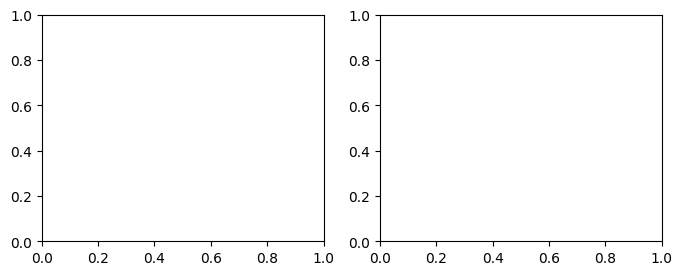

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (4*2, 3*1), dpi = 100)

label = r'$\alpha$-L-arabinopyranose' # use $$ for latex rendering
observable = 'obs_alpha_L_arabinopyranose_cyt'
ax[0].fill_between(avrg.index, 
                   avrg[observable] + stdv[observable], 
                   avrg[observable] - stdv[observable], 
                   label = label, **{'color' : palette[2], 'alpha' : 0.5})

label = r'xylulose 5-phosphate'
observable = 'obs_XYLULOSE_5_PHOSPHATE_cyt'
ax[1].fill_between(avrg.index, 
                   avrg[observable] + stdv[observable], 
                   avrg[observable] - stdv[observable], 
                   label = label, **{'color' : palette[2], 'alpha' : 0.5})

ax[0].set_xlabel('Time [A.U.]')
ax[0].set_ylabel('Concentration [A.U.]')
ax[0].set_title('Cytolasm')
ax[0].set_ylim(top = 200, bottom = 0)

ax[1].set_xlabel('Time [A.U.]')
ax[1].set_title('Cytoplasm')
ax[1].set_ylim(top = 200, bottom = 0)

ax[0].legend(frameon = False)
ax[1].legend(frameon = False)

seaborn.despine()
plt.savefig('model.png', format = 'png', bbox_inches = 'tight', dpi = 300)
plt.show()